In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid",{"axes.facebolor":"0.90"})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":2.5})

import pylab
pylab.rcParams['figure.figsize'] = (20, 20)
plt.style.use('fivethirtyeight')

test='https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

df = pd.read_csv(test,index_col='date', parse_dates=True)
india=df[df['location'] == 'India']
india_rolling7=india.new_deaths.rolling(7).mean().fillna(0)
india_rolling7

# datetime processing
import datetime as datetime
from datetime import datetime as dt
today=dt.today()

today = datetime.date(month=today.month, day=today.day, year=today.year)
yesterday=today-datetime.timedelta(days=1)

print('TODAY: ',today)

print('YESTERDAY: ',yesterday, yesterday.strftime("%A"))

TODAY:  2021-07-25
YESTERDAY:  2021-07-24 Saturday


# <font color=#cf0234> Total COVID-19 Deaths in India as of Today </font>

In [2]:
india_daily=india['total_deaths'].diff(1)
yesterday=india_daily[-1]

In [3]:
# sigma_cases=sum(usa_daily.fillna(0))
print(f"India TOTAL DEATH COUNT: {sum(india_daily.fillna(0)):,} as of "+today.strftime("%A")+' '+str( today))

India TOTAL DEATH COUNT: 420,550.0 as of Sunday 2021-07-25


# <font color=#cf0234> Yesterday's Deaths </font>
   

In [4]:
print(f"Yesterday's Deaths {today}: ",f"{yesterday:,}")

Yesterday's Deaths 2021-07-25:  1,081.0


# <font color=#cf0234> Most recent daily deaths </font>
   

In [5]:
# Past Two Weeks
india_daily.tail(25)

date
2021-06-30    1005.0
2021-07-01     853.0
2021-07-02     738.0
2021-07-03     955.0
2021-07-04     723.0
2021-07-05     553.0
2021-07-06     930.0
2021-07-07     817.0
2021-07-08     911.0
2021-07-09    1206.0
2021-07-10     895.0
2021-07-11     724.0
2021-07-12    2020.0
2021-07-13     622.0
2021-07-14     583.0
2021-07-15     542.0
2021-07-16     560.0
2021-07-17     518.0
2021-07-18     499.0
2021-07-19     374.0
2021-07-20    3998.0
2021-07-21     507.0
2021-07-22     483.0
2021-07-23       0.0
2021-07-24    1081.0
Name: total_deaths, dtype: float64

Text(0.5, 0, 'Date')

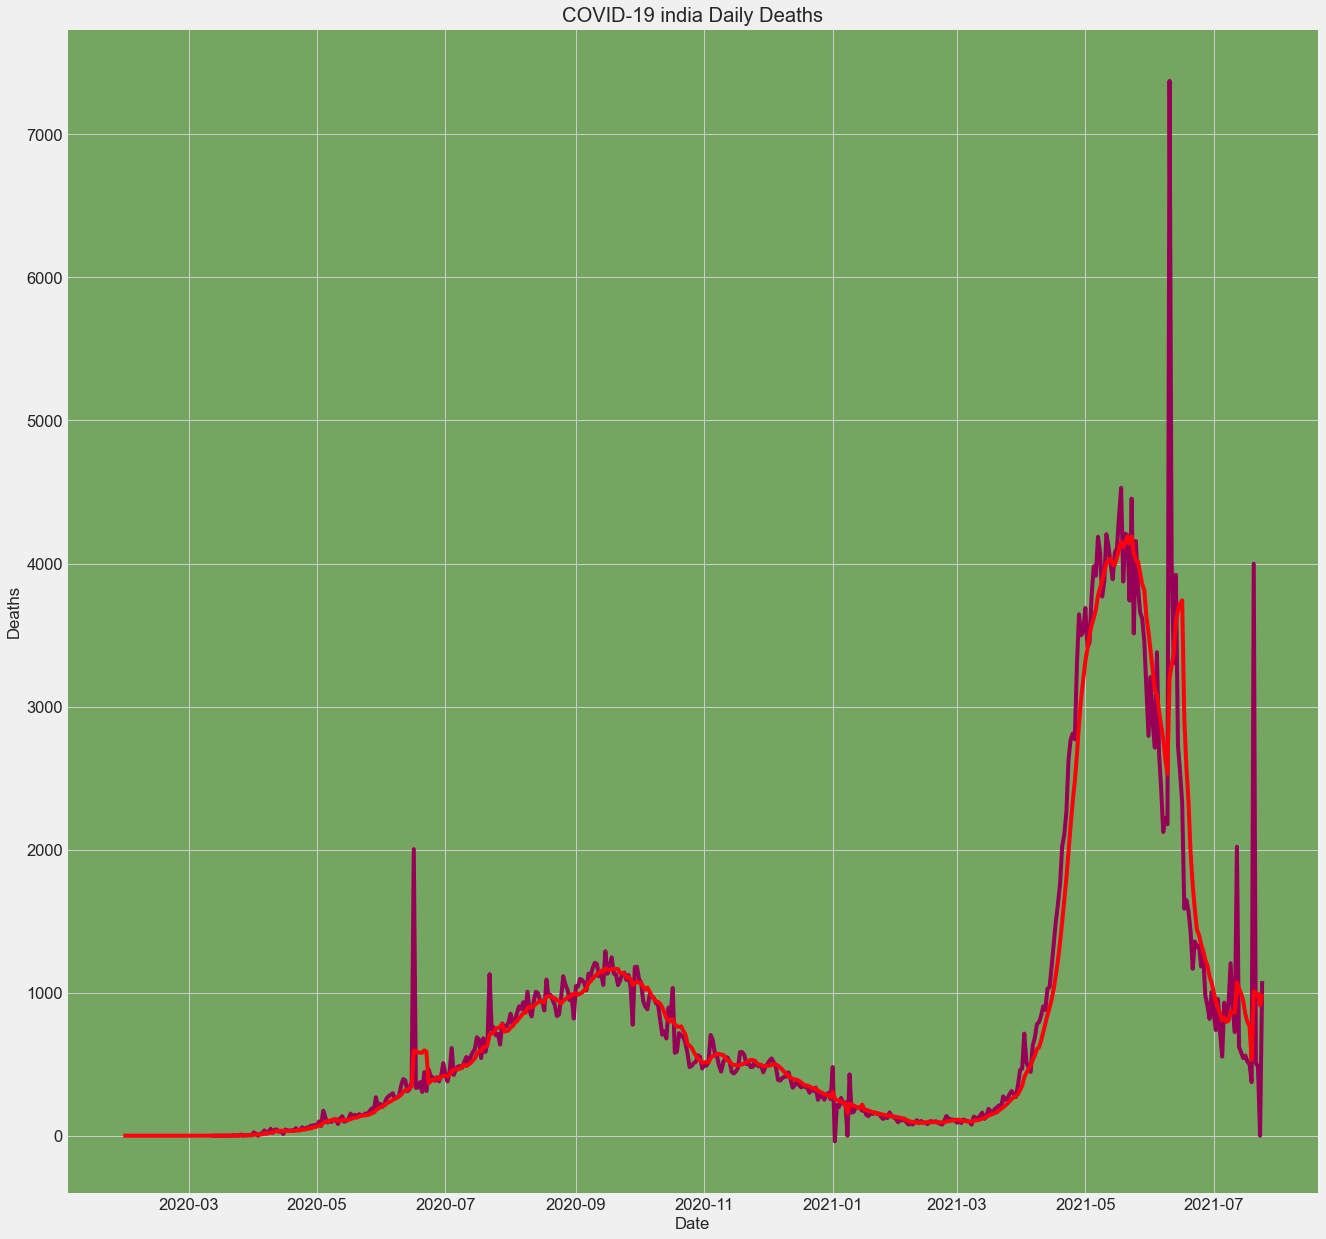

In [6]:
# fig = plt.figure(figsize=(20,12),dpi=200)
x1=india['total_deaths'].diff(1)
ax=sns.lineplot(data=x1,x=x1.index,y=x1,color='#960056')
ax=sns.lineplot(data=india_rolling7, x=india_rolling7.index,y=india_rolling7,color='#ff000d')
ax.set_title('COVID-19 india Daily Deaths')
ax.set_facecolor('xkcd:dull green')
ax.set_ylabel("Deaths")
ax.set_xlabel("Date")
# fig.savefig(f'{today}_covid_deaths_all.png',dpi=165, bbox_inches='tight')

Text(0.5, 0, 'Date')

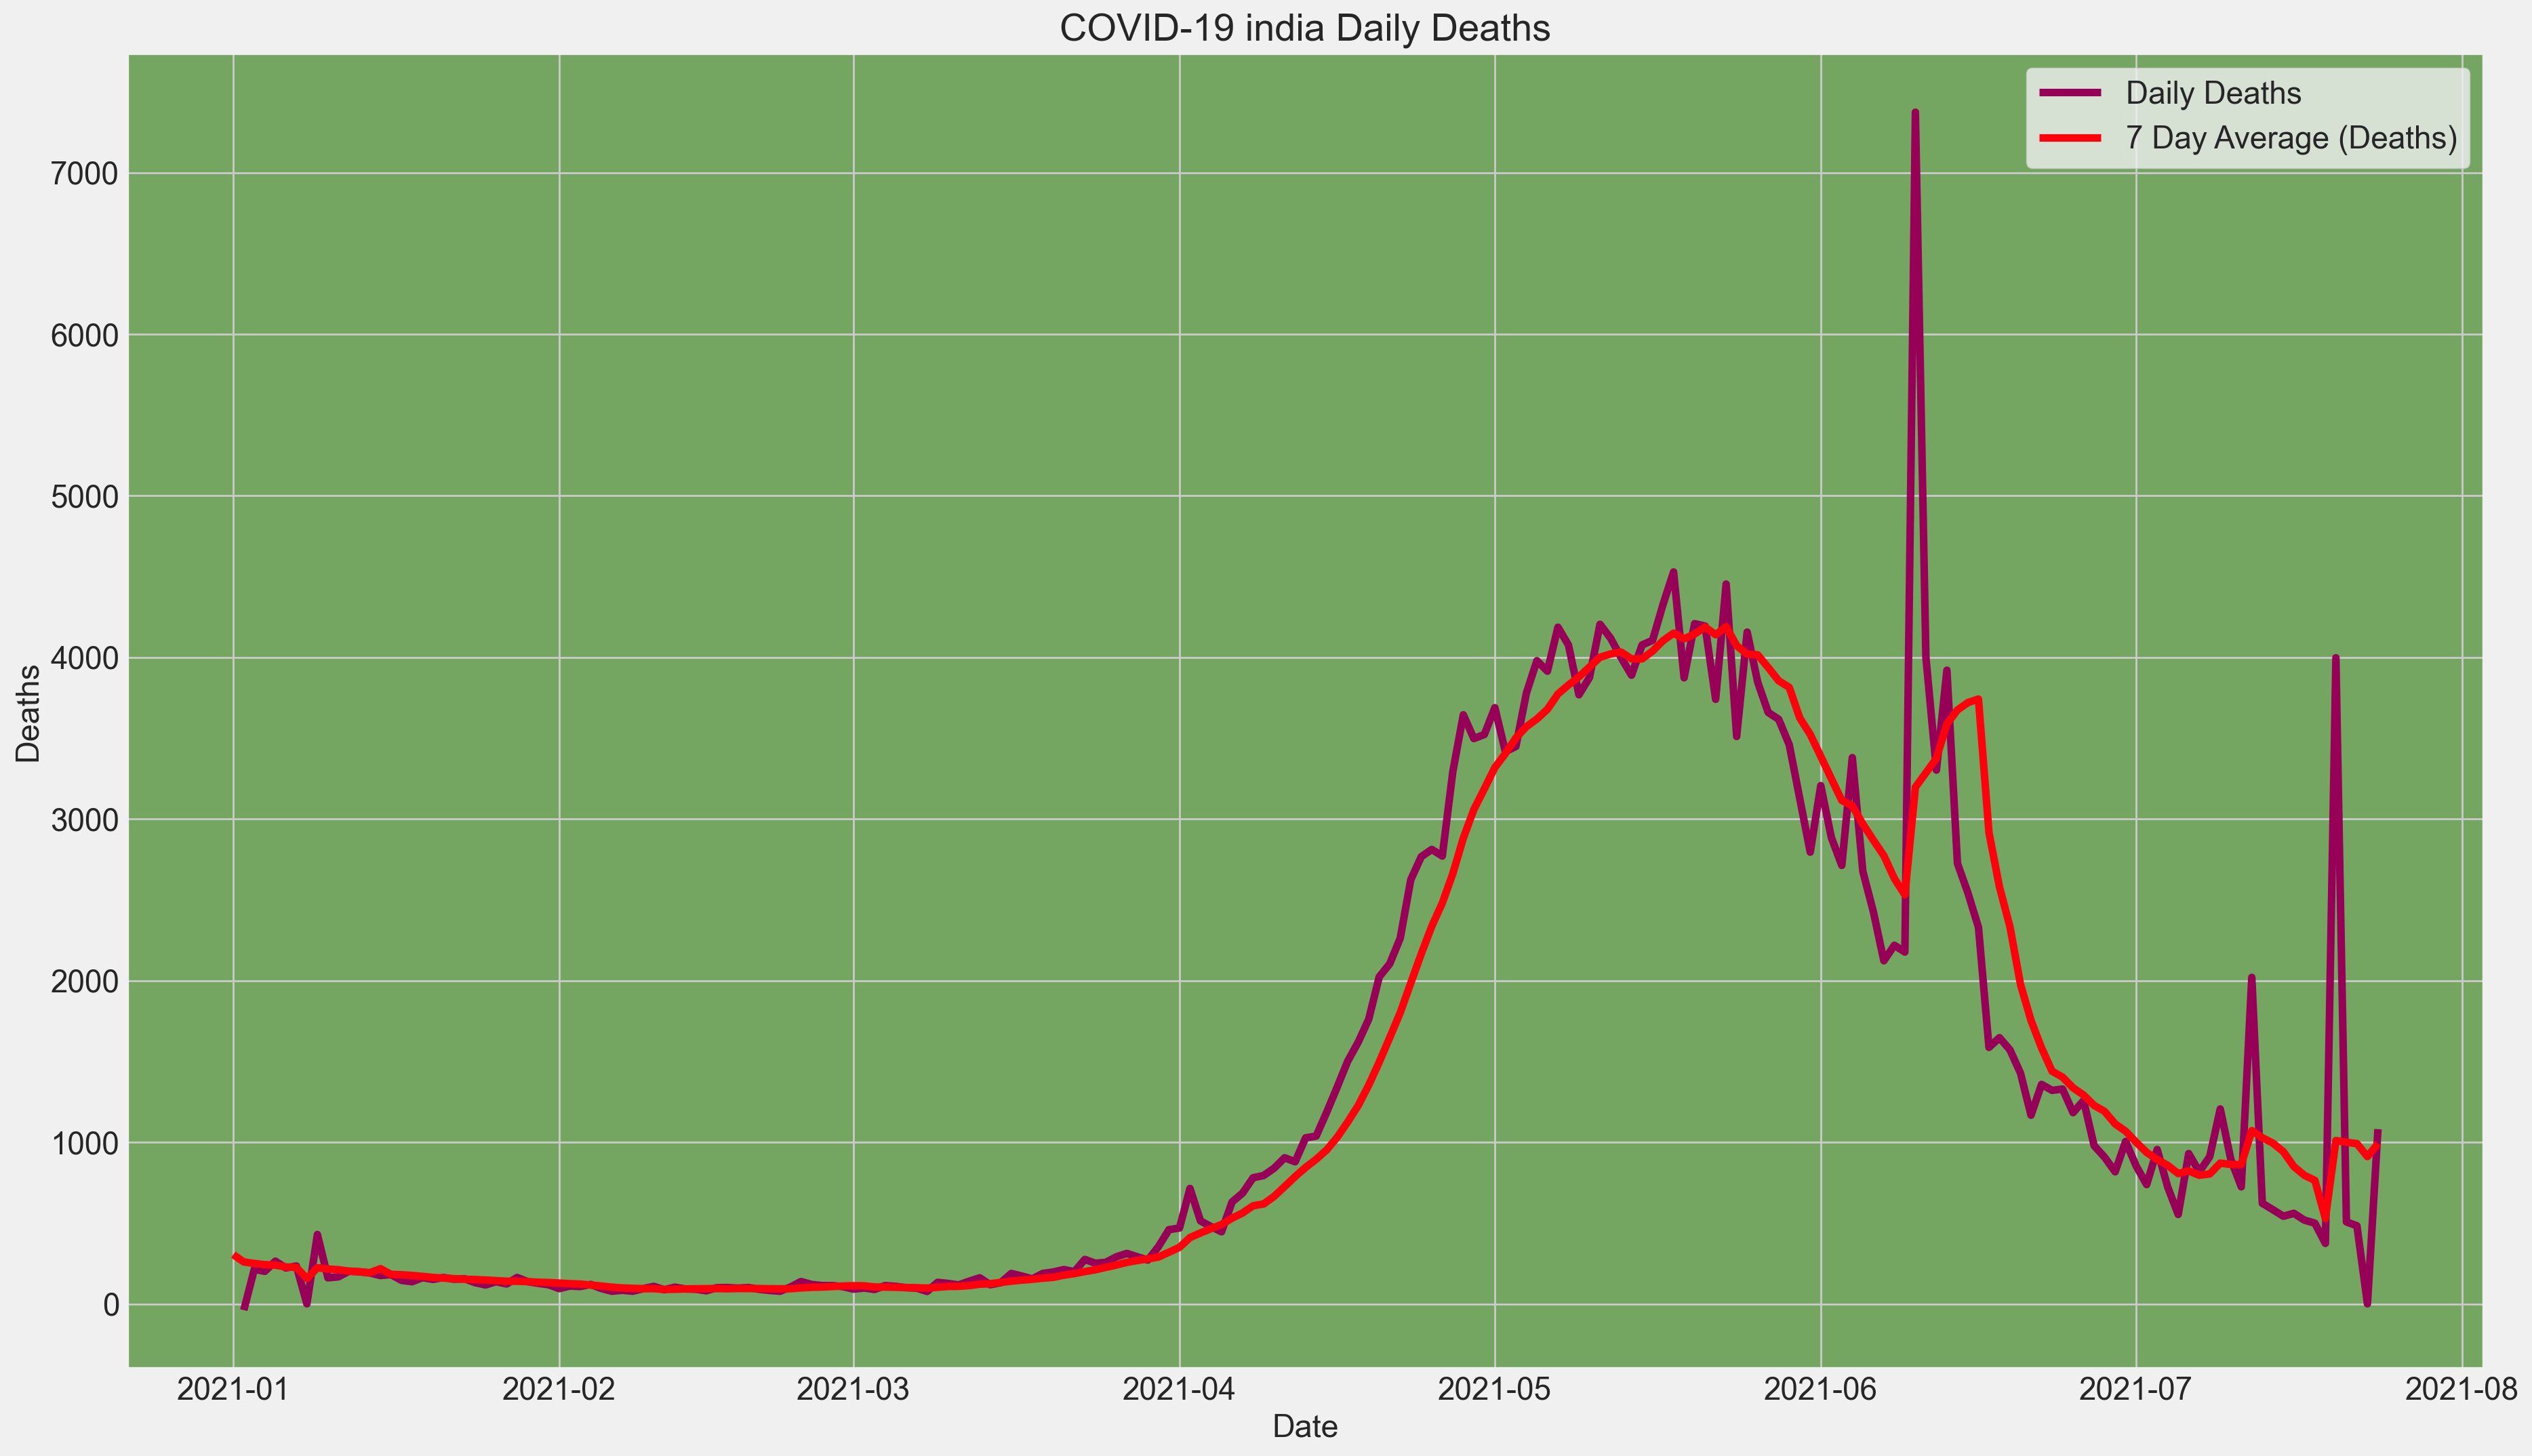

In [7]:
india_rolling7=india_rolling7.loc['2021':]
fig = plt.figure(figsize=(20,12),dpi=200)
x1=india['total_deaths'].loc['2021':].diff(1)
ax=sns.lineplot(data=x1,x=x1.index,y=x1,color='#960056', label='Daily Deaths')
ax=sns.lineplot(data=india_rolling7, x=india_rolling7.index,y=india_rolling7,color='#ff000d',label='7 Day Average (Deaths)')
ax.set_title('COVID-19 india Daily Deaths')
ax.set_facecolor('xkcd:dull green')
ax.set_ylabel("Deaths")
ax.set_xlabel("Date")
# plt.grid(color='r')
# fig.savefig(f'india_{today}_covid19_deaths.png',dpi=165, bbox_inches='tight')

# <font color = '#cf0233'> Extreme maxima

In [8]:
print(f"{india_daily.tail(45).max():,.0f}"," deaths occurred on ",india_daily.tail(45).idxmax().strftime('%B, %d, %Y') )

7,374  deaths occurred on  June, 10, 2021
